# Example uses of xadjoint experiment class

Need [ECCOv4-py](https://github.com/ECCO-GROUP/ECCOv4-py) and xadjoint in your path or environment

In [1]:
import sys

sys.path.insert(0, "/users/emmomp/Python")
sys.path.insert(0, "/users/emmomp/Python/ECCOv4-py/")
import xadjoint as xad

Define where your grid data and adjoint experiment are located

In [2]:
rootdir = "/data/smurphs/emmomp/canari/"
griddir = "/users/emmomp/data/orchestra/grid2/"

expdir = rootdir + "experiments/ad_run_18m_UKshelf_salt/"
startdate = "1996-01-01"  # StartDate_1 from data.cal
lag0 = "1997-03-01"  # Lag 0 for your objective function

Create an experiment object called "myexp"

In [3]:
myexp = xad.Experiment(griddir, expdir, start_date=startdate, lag0=lag0)
myexp

Found 6 ADJ variables
Found 12 adxx variables


<xadjoint.Experiment> 
 Directories: 
	 experiment = /data/smurphs/emmomp/canari/experiments/ad_run_18m_UKshelf_salt/ 
	 grid = /users/emmomp/data/orchestra/grid2/
 Time Data: 
	 Start Date 1996-01-01, Lag Zero 1997-03-01 
	 39 timesteps, deltat = 3600
	 its from 336 to 13104
	 dates from 1996-01-15 to 1997-06-30
	 lag_days from -411.0 to 121.0
	 lag_years from -1.1252566735112937 to 0.33127994524298426
 Adjoint Variables: 
	 ADJ type ['ADJempr', 'ADJqnet', 'ADJsalt', 'ADJtaux', 'ADJtauy', 'ADJtheta'] 
	 adxx type ['adxx_kapredi', 'adxx_empmr', 'adxx_diffkr', 'adxx_etan', 'adxx_qnet', 'adxx_theta', 'adxx_uvel', 'adxx_kapgm', 'adxx_tauv', 'adxx_salt', 'adxx_tauu', 'adxx_vvel']
 No data loaded. Use [].load_vars() to load variables

In [4]:
myexp.load_vars(["adxx_tauu", "adxx_tauv", "adxx_qnet", "ADJsalt"])
print(myexp)

Reading in adxx_tauu
Reading in adxx_tauv
Reading in adxx_qnet
Reading in ADJsalt
<xadjoint.Experiment> 
 Directories: 
	 experiment = /data/smurphs/emmomp/canari/experiments/ad_run_18m_UKshelf_salt/ 
	 grid = /users/emmomp/data/orchestra/grid2/
 Time Data: 
	 Start Date 1996-01-01, Lag Zero 1997-03-01 
	 39 timesteps, deltat = 3600
	 its from 336 to 13104
	 dates from 1996-01-15 to 1997-06-30
	 lag_days from -411.0 to 121.0
	 lag_years from -1.1252566735112937 to 0.33127994524298426
 Adjoint Variables: 
	 ADJ type ['ADJempr', 'ADJqnet', 'ADJsalt', 'ADJtaux', 'ADJtauy', 'ADJtheta'] 
	 adxx type ['adxx_kapredi', 'adxx_empmr', 'adxx_diffkr', 'adxx_etan', 'adxx_qnet', 'adxx_theta', 'adxx_uvel', 'adxx_kapgm', 'adxx_tauv', 'adxx_salt', 'adxx_tauu', 'adxx_vvel']
 Data loaded: <xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50, k_l: 50,
                k_p1: 51, tile: 13, time: 39)
Coordinates: (12/13)
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 8

Quick plots of loaded sensitivities, takes depth mean of any 3-D.

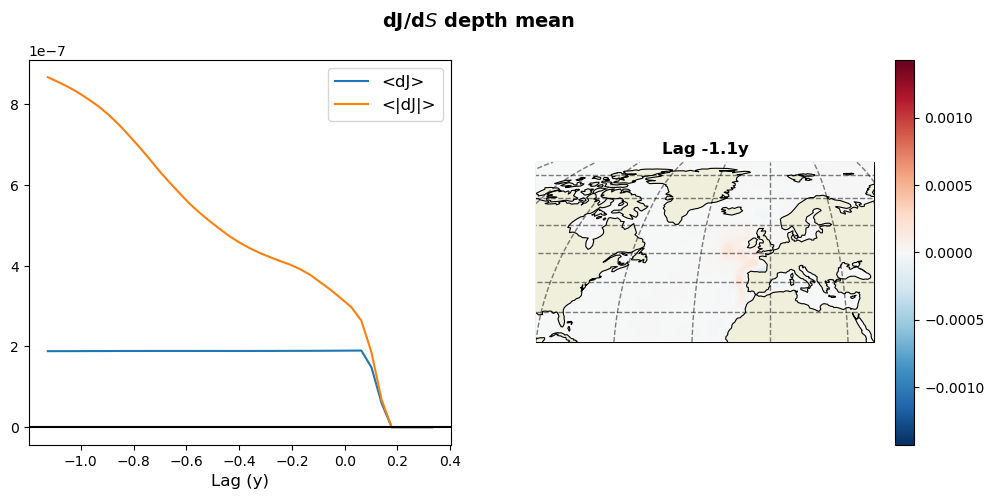

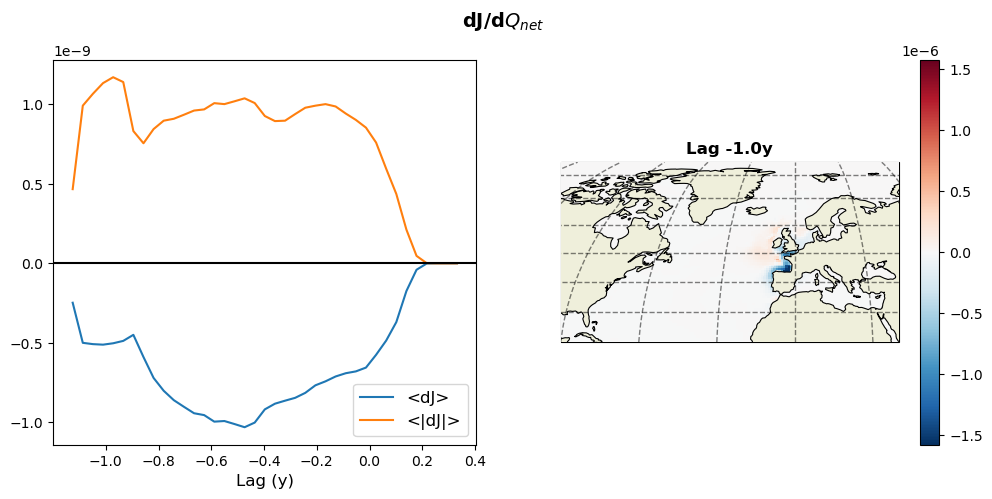

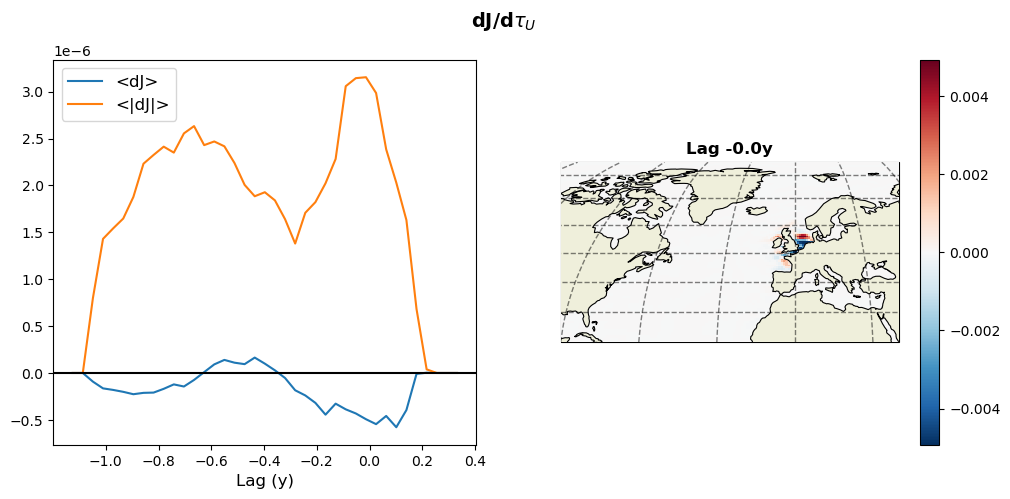

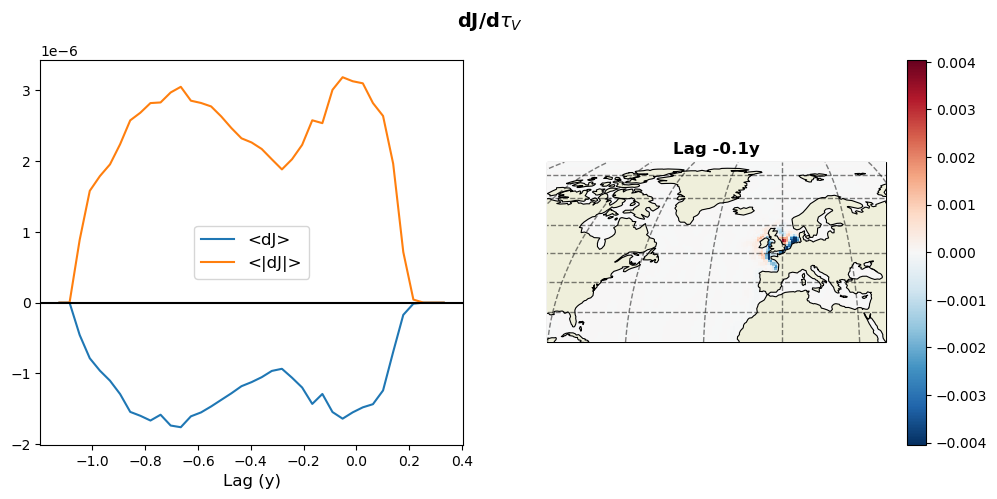

In [5]:
myexp.quick_plots(proj_dict={"projection_type": "robin"}, axlims=[-90, 40, 20, 88])

Create a gif animation

MovieWriter ffmpeg unavailable; using Pillow instead.


0
0
10
20


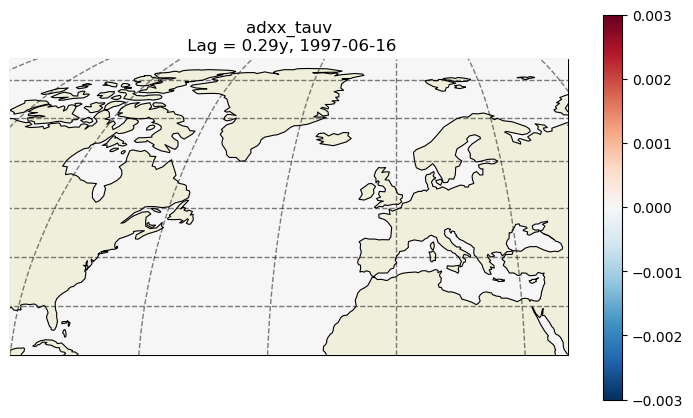

In [13]:
clims = {
    "adxx_tauv": 3e-3
}  # Specify colorbar limits, or defaults to 70% of absolute max over time period
axlims = [-90, 40, 20, 88]
myexp.animate(
    var_list=[
        "adxx_tauv",
    ],
    clims=clims,
    axlims=axlims,
    proj_dict={},
    plots_dir="/data/smurphs/emmomp/canari/plots/animations/",
    tsteps=30,
)

Write data to nctiles format netcdf files, default one per timestep matching ECCOv4r4 format

In [14]:
myexp.to_nctiles(
    [
        "adxx_qnet",
    ]
)

Preparing to write netcdf to /data/smurphs/emmomp/canari/experiments/ad_run_18m_UKshelf_salt/
All variables loaded, starting write
Writing adxx_qnet
All files written to /data/smurphs/emmomp/canari/experiments/ad_run_18m_UKshelf_salt/
